<div align="center">
    <h1>Taller de Computación Científica en Python - 2025</h1>
    <img src="https://www.iycr2014.org/__data/assets/image/0014/133052/logo_cenat.png" alt="Logo CENAT" style="width: 200px;"/>
    
</div>

---

## Modelado de Poblaciones: la Rana Toro  

<center> <img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.lavanguardia.com%2Ffiles%2Fog_thumbnail%2Fuploads%2F2020%2F07%2F10%2F5fa91ccecaf1f.jpeg&f=1&nofb=1&ipt=d47ed0ae76e246238f6566bd88bffb091db4efeb427216f59fe31142a196dadc&ipo=images" alt="image info" width="300"/> </center>

Comprender la distribución de las especies en regiones de interés, y su impacto en el ecosistema es fundamental para la ecología. Empleando las herramientas de manejo de bases de datos de Pandas, la formación de arreglos y el ordenamiento con NumPy, y las sencillas formas de graficar estos datos con Matplotlib; podemos extraer información de altísimo valor. En el presente cuaderno, se realiza un análisis sencillo de **datos reales** de la población de ranas toro (*Lithobates catesbeianus*) en Bélgica y su distribución regional dependiente del año.

Datos extraídos de:

GBIF.org (2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.ajrbpq

---

**Realizado por:**  
Julián Sánchez

In [2]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 56.1 MB/s eta 0:00:00


In [4]:
!git clone https://github.com/jkhansell/sc_notebooks

Cloning into 'sc_notebooks'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 78 (delta 26), reused 46 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (78/78), 10.59 MiB | 14.37 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Opcional: para extraer mapas básicos
import numpy as np
from geopy.distance import geodesic # Para cálculo de distancias
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Primero debemos importar la información. En este caso, empleamos un archivo extraído de GBIF (Global Biodiversity Information Facility) el cual contiene información de avistamientos de diferentes especies en ubicaciones geográficas variadas. Por esto mismo, primero:

## 1. Analizar la información que tenemos

Sabemos que el separador es un tab. Quizás no es tan claro dependiendo de dónde se visualice el archivos .csv, pero se sabe que son varios espacios, por lo que se emplea \t. Además, hay algunas líneas que no cuentan con el mismo número de columnas o datos, por lo que se puede decidir saltar esas líneas para no tener que revisarlas manualmente.

Dado que se incluyen varias especies, se puede primero revisar cuáles son las columnas y delimitar la especie:

In [ ]:
data = pd.read_csv("./sc_notebooks/EjerciciosExtra/Especies Invasoras/datos_ranatoro.csv", delimiter="\t", on_bad_lines='skip')
print("Las columnas disponibles son:",data.columns)


Las columnas disponibles son: Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


## 2. Filtrar los datos que ocupamos

Dado que nos interesa la especie ***Lithobates catesbeianus*** (rana toro americana), empleamos la columna `verbatimScientificName`:

In [ ]:
data = data[data['verbatimScientificName'] == 'Lithobates catesbeianus']

# Y mostramos el encabezado de nuestros datos y el tamaño resultante:

print(f"Se cuenta con {len(data)} datos")
data.head()

Se cuenta con 2926 datos


,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,1936703122,ea95fd9b-58dc-4e48-b51f-9380e9804607,INBO:NBN:BFN001790000BJO3,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,Lithobates catesbeianus,...,BFN00179000005BP,NaN,CC0_1_0,INBO,BFN00179000000TW;BFN00179000005BP,NaN,NaN,2024-04-29T09:26:17.252Z,NaN,TAXON_MATCH_TAXON_ID_IGNORED
2,1936703121,ea95fd9b-58dc-4e48-b51f-9380e9804607,INBO:NBN:BFN001790000BJNG,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,Lithobates catesbeianus,...,BFN00179000005BP,NaN,CC0_1_0,INBO,BFN00179000000TW;BFN00179000005BP,NaN,NaN,2024-04-29T09:26:17.256Z,NaN,TAXON_MATCH_TAXON_ID_IGNORED
5,1936703118,ea95fd9b-58dc-4e48-b51f-9380e9804607,INBO:NBN:BFN001790000BJN7,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,Lithobates catesbeianus,...,BFN00179000005B8,NaN,CC0_1_0,INBO,BFN00179000000TW;BFN00179000005B8,NaN,NaN,2024-04-29T09:26:17.247Z,NaN,TAXON_MATCH_TAXON_ID_IGNORED
7,1936703116,ea95fd9b-58dc-4e48-b51f-9380e9804607,INBO:NBN:BFN001790000BJNJ,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,Lithobates catesbeianus,...,BFN00179000005BP,NaN,CC0_1_0,INBO,BFN00179000005BP;BFN00179000000TW,NaN,NaN,2024-04-29T09:26:17.258Z,NaN,TAXON_MATCH_TAXON_ID_IGNORED
11,1936703112,ea95fd9b-58dc-4e48-b51f-9380e9804607,INBO:NBN:BFN001790000BJNU,Animalia,Chordata,Amphibia,Anura,Ranidae,Lithobates,Lithobates catesbeianus,...,BFN00179000005B8,NaN,CC0_1_0,INBO,BFN00179000000TW;BFN00179000005B8,NaN,NaN,2024-04-29T09:26:17.293Z,NaN,TAXON_MATCH_TAXON_ID_IGNORED


Si bien ahora tenemos la información de la especie que nos interesa, tenemos más información de la que realmente necesitamos. Como es un dataframe tan grande, no es viable revisar los datos uno por uno para saber si nos son útiles, entonces podemos usar el método `unique` sobre una columna:

In [ ]:
data["occurrenceStatus"].unique()

array(['ABSENT', 'PRESENT'], dtype=object)

Para este caso, haremos uso solamente de las columnas de **occurrenceStatus**, **individualCount**, **decimalLatitude**, **decimalLongitude** y **year**:

In [ ]:
columnas = ["occurrenceStatus", "individualCount", "decimalLatitude", "decimalLongitude", "year"]

data = data[columnas]
data.head()

,occurrenceStatus,individualCount,decimalLatitude,decimalLongitude,year
1,ABSENT,0.0,51.22829,4.97883,2018
2,ABSENT,0.0,51.24773,5.00860,2018
5,PRESENT,1.0,51.24773,5.00860,2017
7,ABSENT,0.0,51.24773,5.00860,2018
11,ABSENT,0.0,51.22829,4.97883,2017


Dado que hay casos de ausencia y de presencia, podemos analizar cuántos de estos son `occurrenceStatus==ABSENT` o `occurrenceStatus==PRESENT`. Luego de eso, nos vamos a quedar con los casos detectados, por lo que no será necesario contar con la columna **occurrenceStatus**:

In [ ]:
data_present = data[data['occurrenceStatus'] == 'PRESENT']
data_absent = data[data['occurrenceStatus'] == 'ABSENT']

print(f"Se cuenta con {len(data_present)} presencias y {len(data_absent)} ausencias")

Se cuenta con 2379 presencias y 547 ausencias


In [ ]:
data = data_present.drop('occurrenceStatus', axis=1)
data.head()

,individualCount,decimalLatitude,decimalLongitude,year
5,1.0,51.24773,5.00860,2017
93,1.0,51.13370,4.59840,2018
102,1.0,51.13315,4.60917,2018
138,4.0,51.13370,4.59840,2018
419,116.0,51.14406,5.15615,2018


## 3. Graficar nuestros datos

Ahora que contamos con datos, podemos empezar a extraer información.

Primero, podemos analizar cómo se distribuyen **geográficamente** los avistamientos, y cuántos en cada región. Para esto empleamos las coordenadas del dataframe e `individualCount` para escalar el tamaño del punto. Primero definimos los límites del mapa:

In [ ]:

# Límites del mapa

phase = 0.5
lat_min = data['decimalLatitude'].min()-phase
lat_max = data['decimalLatitude'].max()+phase
lon_min = data['decimalLongitude'].min()-phase
lon_max = data['decimalLongitude'].max()+phase

Para saber en qué periodo se obtuvo la información, usamos los valores límites del año:

In [ ]:
year_min = data["year"].min()
year_max = data["year"].max()

Finalmente, montamos la figura:

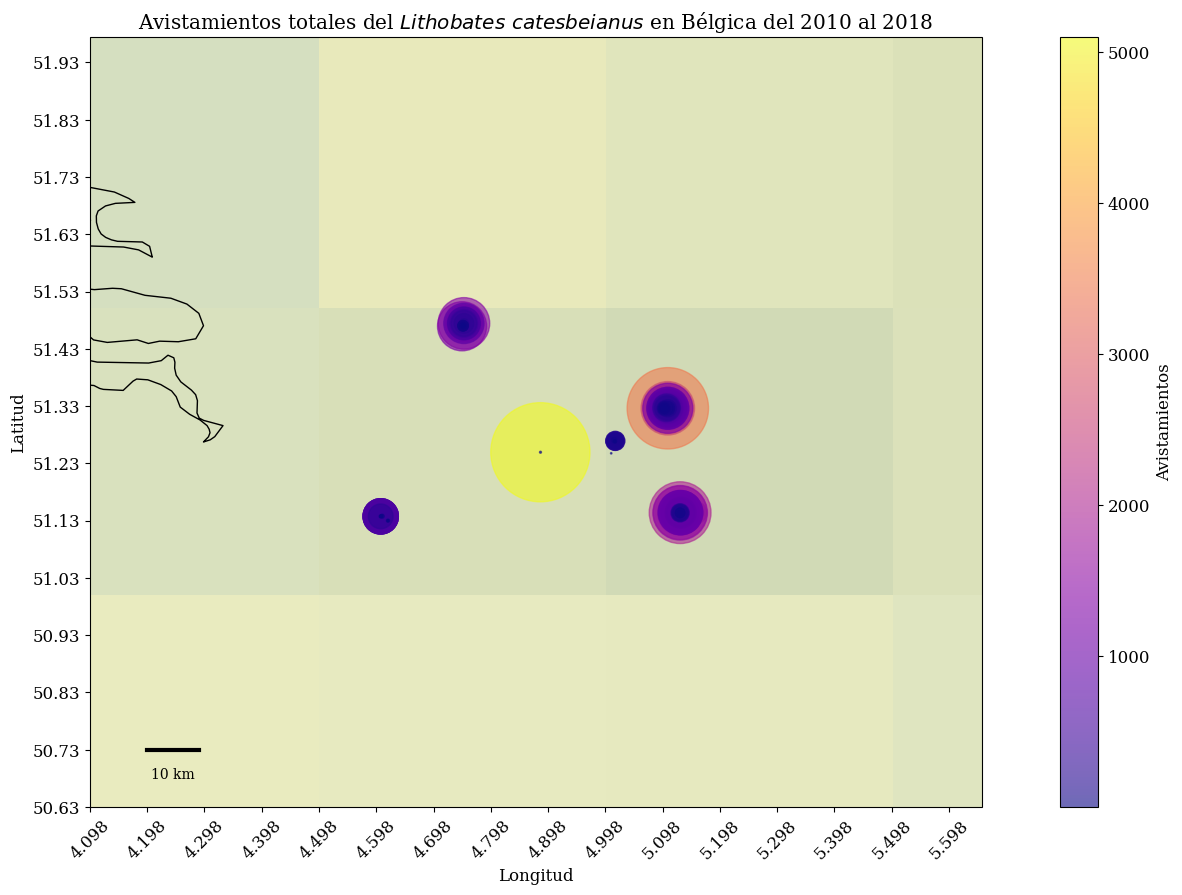

In [ ]:
# Podemos darle un formato más profesional para publicación
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Creamos la figura con una proyección cilíndrica (PlateCarree, que significa "plano cuadrado")
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Se añade el mapa de fondo para tener una referencia
ax.stock_img()
ax.coastlines()

# Graficamos los puntos, se pueden escalar si hiciera falta
scale = 1
scatter = ax.scatter(data['decimalLongitude'], data['decimalLatitude'],
                     s=data['individualCount'] * scale,
                     c=data['individualCount'],
                     cmap='plasma',
                     alpha=0.6,
                     transform=ccrs.PlateCarree())   # Asegura que haya concordancia de las coordenadas

# Podemos añadir una barra de escala para hacernos una idea de las distancias en el plano
scalebar_lon = lon_min + 0.1
scalebar_lat = lat_min + 0.1
scalebar_length_km = 10

# Hay que convertir la distancia, por lo que podemos usar una aproximación de 111 km por grado
scalebar_length_deg = scalebar_length_km / 111

ax.plot([scalebar_lon, scalebar_lon + scalebar_length_deg],
        [scalebar_lat, scalebar_lat],
        color='black', linewidth=3, transform=ccrs.PlateCarree())

ax.text(scalebar_lon + scalebar_length_deg / 2, scalebar_lat - 0.05,
        f'{scalebar_length_km} km',
        color='black', fontsize=10, ha='center', transform=ccrs.PlateCarree())

ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title(f'Avistamientos totales del ${{\it{{Lithobates\ catesbeianus}}}}$ en Bélgica del {year_min} al {year_max}')
ax.set_xticks(np.arange(lon_min, lon_max, 0.1))
ax.set_yticks(np.arange(lat_min, lat_max, 0.1))
ax.xaxis.set_tick_params(labelrotation=45)

plt.colorbar(scatter, label='Avistamientos')

plt.show()

También podemos estudiar cómo evoluciona la población con el tiempo:

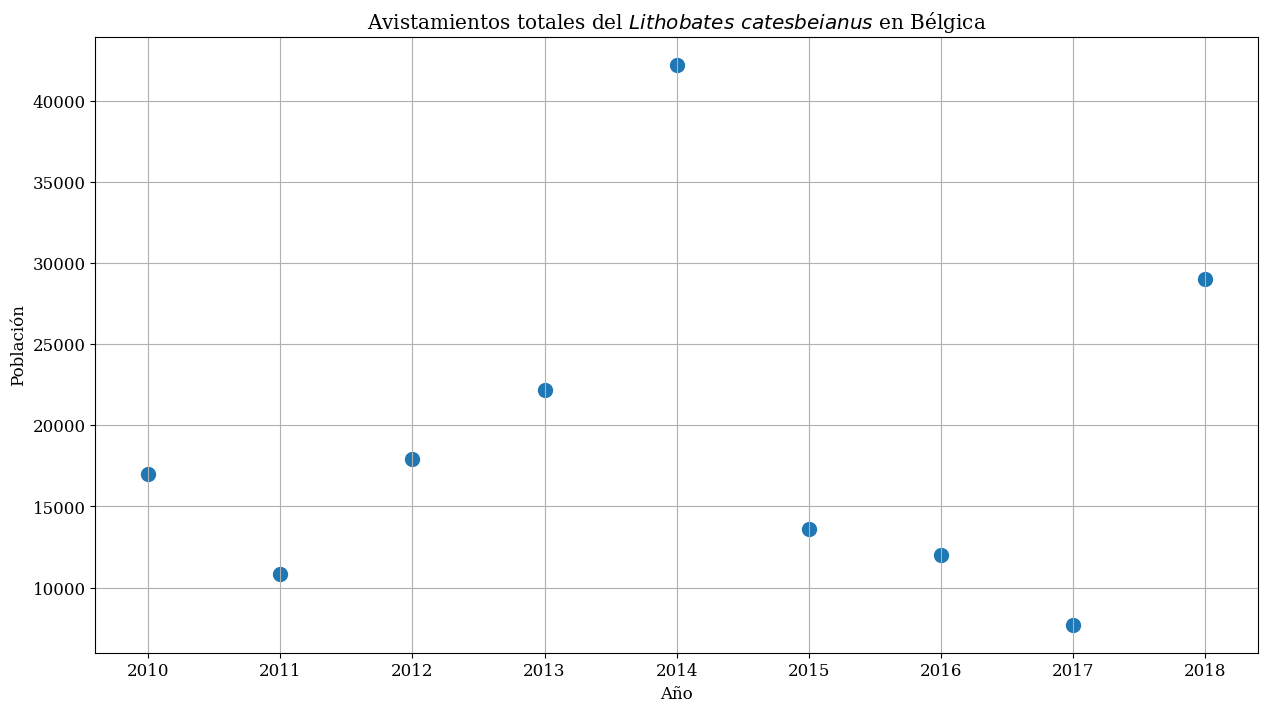

In [ ]:
# Primero generamos un df con una agrupación por año, y en cada año se suman todas las entradas
sum_popul_per_year = data.groupby('year')['individualCount'].sum()

plt.figure(figsize=(15, 8))
plt.scatter(sum_popul_per_year.index, sum_popul_per_year.values, s=100)

plt.xlabel('Año')
plt.ylabel('Población')
plt.title(f'Avistamientos totales del ${{\it{{Lithobates\ catesbeianus}}}}$ en Bélgica')

plt.grid()
plt.show()

## 4. Modelo de ajuste sencillo

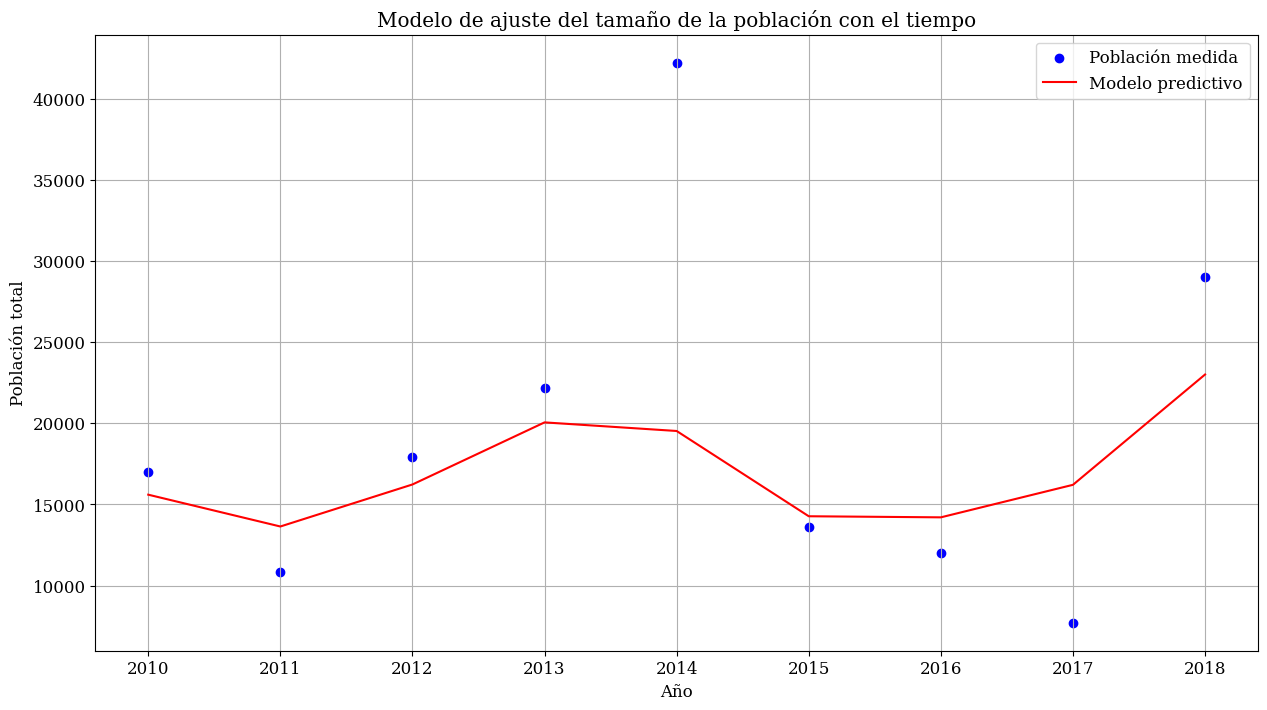

In [ ]:
# Agrupamos los datos que obtuvimos del gráfico anterior
sum_popul_per_year = data.groupby('year')['individualCount'].sum().reset_index()

X = sum_popul_per_year[['year']].values
y = sum_popul_per_year['individualCount'].values

# Separamos entre los datos de entrenamiento y validación. El random_state puede ser cualquier entero
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

# Creamos un modelo y lo entrenamos
model = RandomForestRegressor(n_estimators=100, random_state=420)
model.fit(X_train, y_train)

# Obtenemos predicciones para la población
y_pred = model.predict(X)

# Comparamos el modelo con los datos reales
plt.figure(figsize=(15, 8))
plt.scatter(X, y, color='blue', label='Población medida')
plt.plot(X, y_pred, color='red', label='Modelo predictivo')
plt.xlabel('Año')
plt.ylabel('Población total')
plt.title('Modelo de ajuste del tamaño de la población con el tiempo')
plt.legend()
plt.grid()
plt.show()


## 5. Tomar decisiones y concluir

Hacer ciencia de datos no solamente es calcular parámetros, hacer pruebas y mostrar gráficos, es necesario tomar decisiones y concluir información de estos. Podemos observar que cercano al municipio de Turnhout, de la ciudad de Amberes, hay una fuerte presencia de esta especie invasiva, con un estudio realizado en 2014 que mostró una población importante, por lo que se puede sugerir que deba evaluarse la proporción del impacto referente a las especies nativas.

Además, fomentar el estudio continuo de la presencia de la rana toro en la zona a años futuros será importante para regular su impacto ecológico **¡Y esto gracias a estudiar datos libres en internet!**
